<a href="https://colab.research.google.com/github/supriyaohdar/suven-consultancy/blob/main/Meterological_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Performing Analysis on Meterological Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory.csv


In [ ]:
df=pd.read_csv("weatherHistory.csv")

In [ ]:
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [ ]:
df.shape

(96453, 12)

In [ ]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [ ]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 95936, dtype: datetime64[ns, UTC]

In [ ]:
df.dtypes

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Loud Cover                              float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object

In [ ]:
df.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 20:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


column precipitation type has missing value because its count is less.

In [ ]:
df.Summary.value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [ ]:
df['Precip Type'].value_counts()


rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
df['Precip Type'].isnull().value_counts()

False    95936
True       517
Name: Precip Type, dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,95936,95936,95936,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000,95936
unique,95912,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 17:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31635,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20020
mean,NaN,NaN,NaN,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038,NaN
std,NaN,NaN,NaN,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000,NaN
50%,NaN,NaN,NaN,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000,NaN
75%,NaN,NaN,NaN,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000,NaN


In [ ]:
df['Daily Summary'].value_counts()

Mostly cloudy throughout the day.         20020
Partly cloudy throughout the day.          9930
Partly cloudy until night.                 6169
Partly cloudy starting in the morning.     5177
Foggy in the morning.                      4201
                                          ...  
Rain until afternoon.                        17
Rain until morning.                          12
Light rain in the morning.                   11
Drizzle starting in the evening.              9
Light rain overnight.                         3
Name: Daily Summary, Length: 214, dtype: int64

In [ ]:
data_columns = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = df[data_columns].resample('MS').mean()
df_monthly_mean.head()


,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


Here we find the mean of apparent temp. and Humidity for month starting.


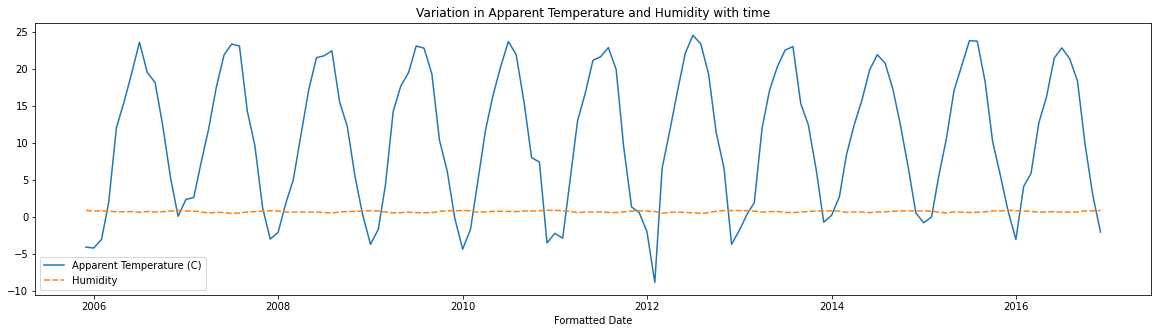

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Variation in Apparent Temperature and Humidity with time")
sns.lineplot(data=df_monthly_mean)

From above figure we can say that there is a slight change in Apparent temperature but Humidity remains same throughout the year.


In [ ]:
df1 = df_monthly_mean[df_monthly_mean.index.month==4]
print(df1)

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-04-01 00:00:00+00:00                 12.098827  0.728625
2007-04-01 00:00:00+00:00                 11.894421  0.536361
2008-04-01 00:00:00+00:00                 11.183688  0.693194
2009-04-01 00:00:00+00:00                 14.267076  0.567847
2010-04-01 00:00:00+00:00                 11.639406  0.706875
2011-04-01 00:00:00+00:00                 12.978997  0.591625
2012-04-01 00:00:00+00:00                 11.780703  0.643583
2013-04-01 00:00:00+00:00                 12.045563  0.677667
2014-04-01 00:00:00+00:00                 12.486181  0.691403
2015-04-01 00:00:00+00:00                 10.632801  0.547764
2016-04-01 00:00:00+00:00                 12.731427  0.659972


Here we find the mean of apparent temp. and Humidity for the month of April.

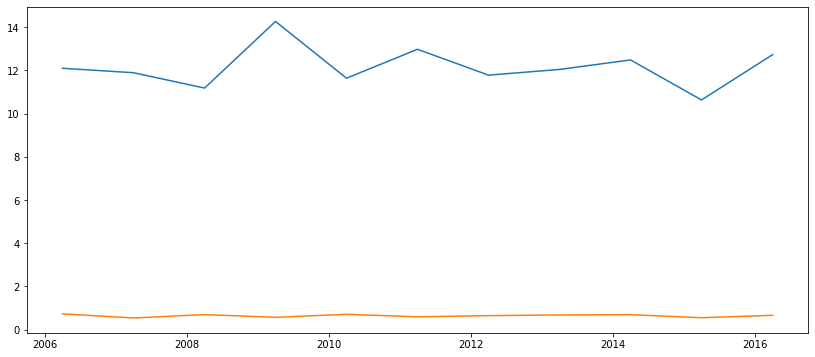

In [ ]:
#df_april=df1[df_1.index.month==4]

plt.figure(figsize=(14,6))
plt.plot(df1)

Here we clearly see that apparent temperature increases and decreases for different years. There is an increment in the year 2009 and then sudden decrement in the year 2010 and this format continues for the rest of the year.
Humidity remains same throughout the year.
This discontinuous increase and decrease in apparent temperatue has a great impact on global Warming.